## NADILA IMAARAH_3323600015_D4 SAINS DATA TERAPAN A

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## NO 2 MENGHITUNG JUMLAH BARIS DAN KOLOM

In [ ]:
rows, cols = df.shape
print(f"Jumlah baris: {rows}, Jumlah kolom: {cols}")


Jumlah baris: 1349, Jumlah kolom: 14


**ANALISIS**

df.shape adalah atribut dari objek DataFrame df yang mengembalikan sebuah tuple yang berisi dua nilai: jumlah baris dan jumlah kolom pada DataFrame.
rows, cols adalah variabel yang digunakan untuk menyimpan hasil tuple ini.


## NO 3 MENGAMBIL DATASET KOLOM NAME,SEX, AGE,PCLASS DAN FARE

In [ ]:
data = pd.DataFrame(df,columns=['name', 'sex', 'age', 'pclass', 'fare'])
data.head()


,name,sex,age,pclass,fare
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,211.3375
1,"Allison, Master. Hudson Trevor",male,0.9167,1,151.5500
2,"Allison, Miss. Helen Loraine",female,2.0000,1,151.5500
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,151.5500


## NO 4 MENGAMBIL DATA SET KOLOM KELAS (SURVIVED)

In [ ]:
data = pd.DataFrame(df,columns=['survived'])
data.head()


,survived
0,1
1,1
2,0
3,0
4,0


## NO 5 DATA + FITUR RELATIVES

In [ ]:
# Menambahkan fitur 'Relatives'
df['relatives'] = df['sibsp'] + df['parch']

# Tampilkan dataset dengan fitur baru
df[['name', 'sex', 'age', 'pclass', 'fare', 'relatives']].head()


,name,sex,age,pclass,fare,relatives
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,211.3375,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,151.5500,3
2,"Allison, Miss. Helen Loraine",female,2.0000,1,151.5500,3
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,151.5500,3
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,151.5500,3


**ANALISIS**

Pada koding ini membuat fitur baru bernama relatives, fitur ini berisikan penjumlahan dari data di fitur sibsp dan parch .

sibsp = jumlah saudara kandung dan pasangan penumpang
parch = jumlah orangtua dan anak anak

Tujuan nya untuk Menambahkan informasi berapa banyak keluarga/kerabat yang ikut bersama penumpang.



## NO 6 HITUNG PENUMPANG MASING-MASING Pclass

In [ ]:
pclass_counts = df['pclass'].value_counts()
print(pclass_counts)
pclass_counts

pclass
3    747
1    324
2    278
Name: count, dtype: int64


pclass
3    747
1    324
2    278
Name: count, dtype: int64

**ANALISIS**
.value_counts():

Fungsi ini digunakan untuk menghitung berapa banyak penumpang yang ada di setiap kelas.

## NO 7 HITUNG JUMLAH BERDASARKAN SEX

In [ ]:
# Hitung jumlah penumpang berdasarkan jenis kelamin
sex_counts = df['sex'].value_counts()
print(sex_counts)
sex_counts


sex
male      874
female    475
Name: count, dtype: int64


sex
male      874
female    475
Name: count, dtype: int64

## NO 8 Hitung jumlah penumpang selamat (1) dan tidak selamat (0) berdasarkan Pclass

In [ ]:
# Hitung jumlah penumpang selamat dan tidak selamat berdasarkan Pclass
survival_counts = df.groupby(['pclass', 'survived']).size().unstack()
print(survival_counts)
survival_counts


survived    0    1
pclass            
1         123  201
2         158  120
3         566  181


survived,0,1
pclass,,
1,123,201
2,158,120
3,566,181


**ANALISIS**
untuk menghitung jumlah penumpang selamat dan tidak selamat berdasakan pclass disinisaya harus mengelompokkan berdasarkan pclass dan survide dengan bantuan groupby, agar mudah di baca saya menampilkan dengan baris adalah pclass dan kolomnya berupa survived dengan bantuan .unstack()

In [ ]:
# Hitung jumlah penumpang selamat dan tidak selamat berdasarkan Pclass
survival_counts = df.groupby(['pclass', 'survived']).size()
print(survival_counts)
survival_counts


pclass  survived
1       0           123
        1           201
2       0           158
        1           120
3       0           566
        1           181
dtype: int64


pclass  survived
1       0           123
        1           201
2       0           158
        1           120
3       0           566
        1           181
dtype: int64

## NO 9 Visualisasi dengan warna yang berbeda untuk class dimana sumbu x=urutan data dan sumbu y=Sex

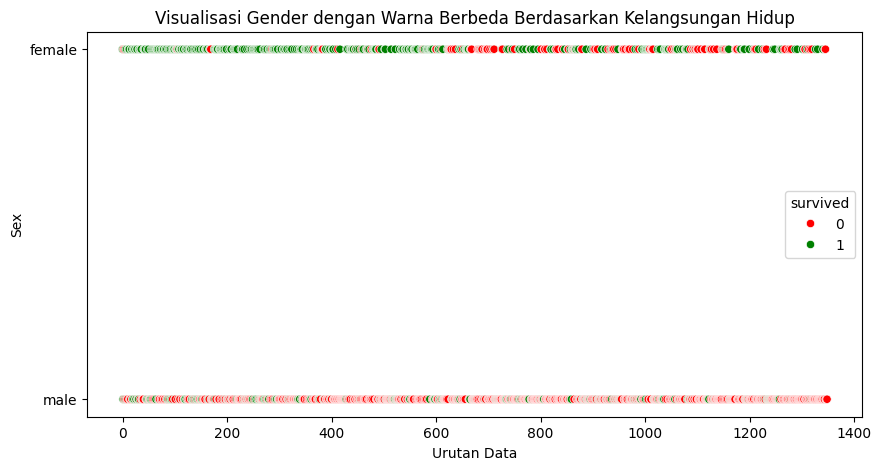

In [ ]:
# Visualisasi dengan warna berbeda berdasarkan Survived
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['sex'], 
                hue=df['survived'], palette={0: "red", 1: "green"})
plt.xlabel("Urutan Data")
plt.ylabel("Sex")
plt.title("Visualisasi Gender dengan Warna Berbeda Berdasarkan Kelangsungan Hidup")
plt.show()


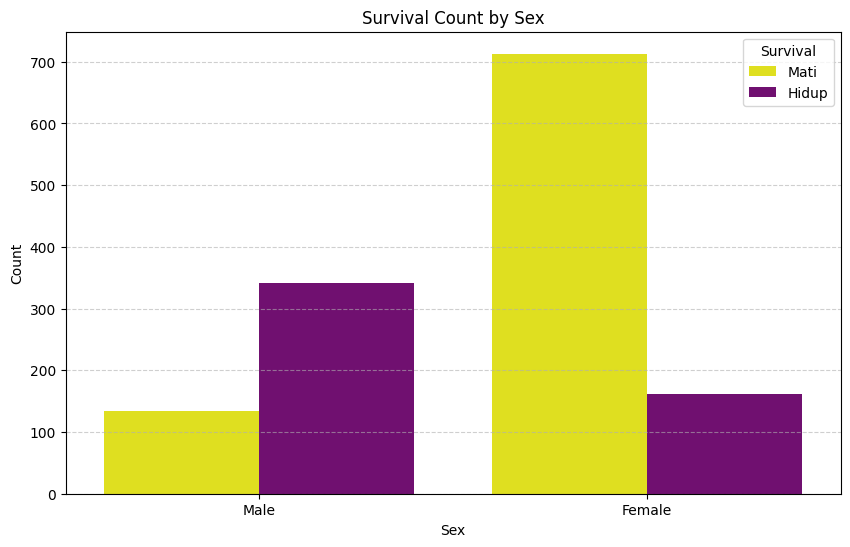

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex',
               hue='survived', palette={0: 'yellow', 1: 'purple'})
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survival', labels=['Mati', 'Hidup'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


## NO 10 Visualisasi dengan warna yang berbeda untuk class dimana sumbu x=urutan data dan sumbu y=Age (abaikan data yang terdapat missing value)

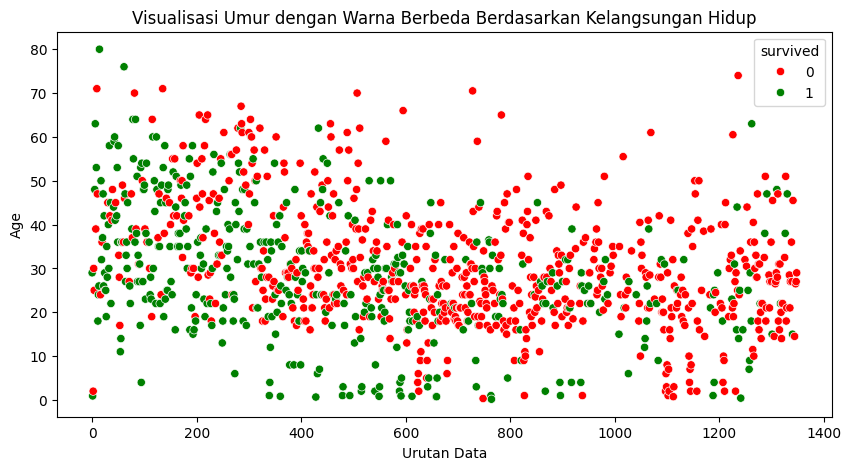

In [ ]:
# Hapus data dengan Age yang missing
df_cleaned = df.dropna(subset=['age'])

# Visualisasi dengan warna berbeda berdasarkan Survived
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned.index, y=df_cleaned['age'], 
                hue=df_cleaned['survived'], palette={0: "red", 1: "green"})
plt.xlabel("Urutan Data")
plt.ylabel("Age")
plt.title("Visualisasi Umur dengan Warna Berbeda Berdasarkan Kelangsungan Hidup")
plt.show()
